# "Empresa X" - Teste Dados

### Parte 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# carregando e tratando os dados
csv_file = "desafio/Dados_Ibovespa.csv"

df = pd.read_csv(csv_file)

# renomeando colunas
df = df.rename(columns={"Último" : "Ultimo", "Máxima" : "Maxima", "Mínima" : "Minima", "Vol." : "Volume", "Var%": "Variacao(%)"})

# converte a coluna Data p/ formato datetime
df.Data = pd.to_datetime(df.Data, format = "%d.%m.%Y")


# ajustando os dados da coluna 'Volume" p/ entao converter de str para int
for lbl, srs in df.iterrows():
    
    if 'M' in srs["Volume"] and ',' in srs["Volume"]:
        tmp = srs["Volume"].replace('M', '0000')
        df.at[lbl, "Volume"] = tmp.replace(',', '')

    elif 'K' in srs["Volume"] and ',' in srs["Volume"]:
        tmp = srs["Volume"].replace('K', '0')
        df.at[lbl, "Volume"] = tmp.replace(',', '')

# convertendo p/ int
df.Volume = df.Volume.astype(int)


# ajustando os dados da coluna 'Variacao(%)" p/ converter de str para float
for lbl, srs in df.iterrows():
    if ',' in srs["Variacao(%)"]:
        tmp = srs["Variacao(%)"].replace(',', '.')
    df.at[lbl, "Variacao(%)"] = tmp.replace('%', '')

# convertendo p/ float e dividindo por 100
df["Variacao(%)"] = (df["Variacao(%)"].astype(float))/100

          Data   Ultimo  Abertura   Maxima   Minima    Volume  Variacao(%)
0   2022-03-08  111.610   111.594  111.703  111.590     32440       0.0001
1   2022-03-07  111.593   114.469  114.529  111.140  14060000      -0.0252
2   2022-03-04  114.474   115.166  115.166  113.389  10720000      -0.0060
3   2022-03-03  115.166   115.173  115.948  115.010  12120000      -0.0001
4   2022-03-02  115.174   113.143  115.429  113.143  10700000       0.0180
..         ...      ...       ...      ...      ...       ...          ...
536 2020-01-08  116.247   116.667  117.335  115.693   5910000      -0.0036
537 2020-01-07  116.662   116.872  117.076  115.965   4850000      -0.0018
538 2020-01-06  116.878   117.707  117.707  116.269   6570000      -0.0070
539 2020-01-03  117.707   118.564  118.792  117.341   6830000      -0.0073
540 2020-01-02  118.573   115.652  118.573  115.649   5160000       0.0253

[541 rows x 7 columns]


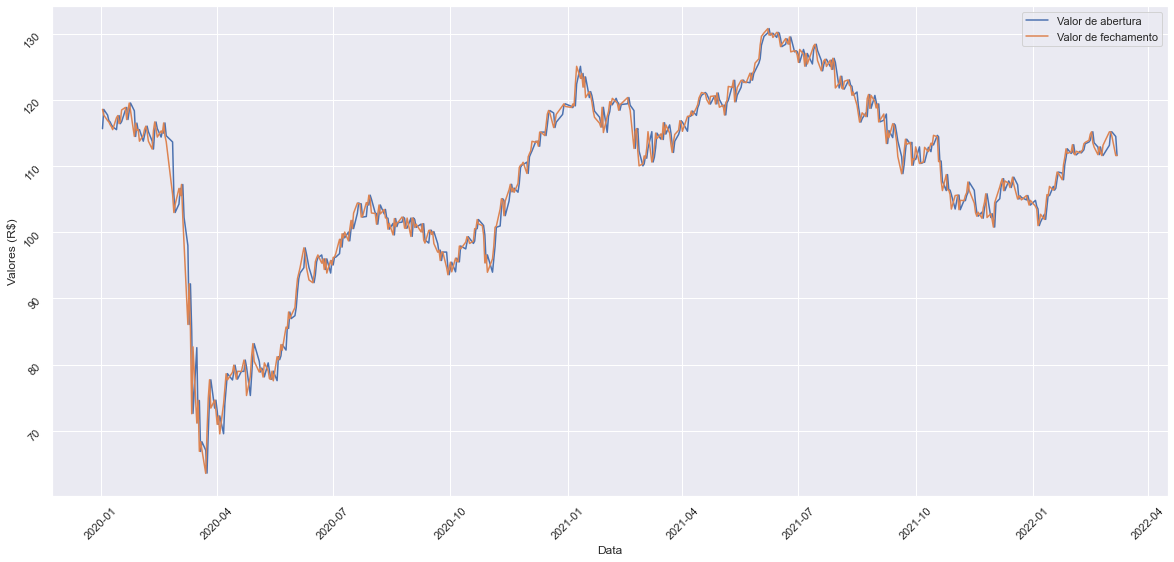

In [27]:
fig, axs = plt.subplots()
plt.tick_params(rotation=45)

# axs.plot(df["Data"], df["Máxima"])
# axs.plot(df["Data"], df["Abertura"])

# axs.plot(df["Data"], df["Abertura"], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
# axs.plot(df["Data"], df["Último"])

# axs.plot(df.Data, df.Maxima)
# axs.plot(df.Data, df.Minima)

axs.plot(df.Data, df.Abertura)
axs.plot(df.Data, df.Ultimo)

axs.legend(["Valor de abertura", "Valor de fechamento"])
axs.set_xlabel("Data")
axs.set_ylabel("Valores (R$)")

# axs.legend(["Valor Maximo", "Valor Minimo", "Valor de fechamento", "Valor de Abertura"])
plt.grid(True)
plt.show()


<AxesSubplot:>

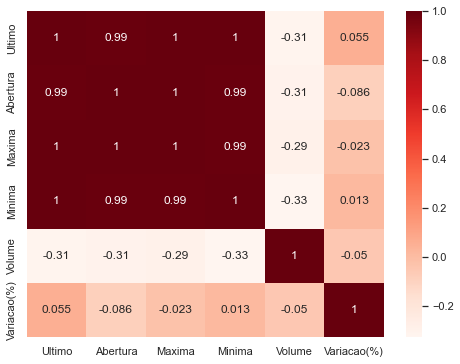

In [28]:
# heatmap p/ checar correlacao entre as variaveis
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="Reds", annot=True)

In [29]:
# abertura, minima, maxima, ultimo sao mto correlacionadas
# criando novas relacoes(variaveis) p/ melhor analise
df["Max-Min"] = df["Maxima"] - df["Minima"]
df["Abertura-Fechamento"] = df["Abertura"] - df["Ultimo"]
df["Abertura-Min"] = df["Abertura"] - df["Minima"]
df["Abertura-Max"] = df["Abertura"] - df["Maxima"]
df["Fechamento-Min"] = df["Ultimo"] - df["Minima"]
df["Fechamento-Max"] = df["Ultimo"] - df["Maxima"]

<AxesSubplot:>

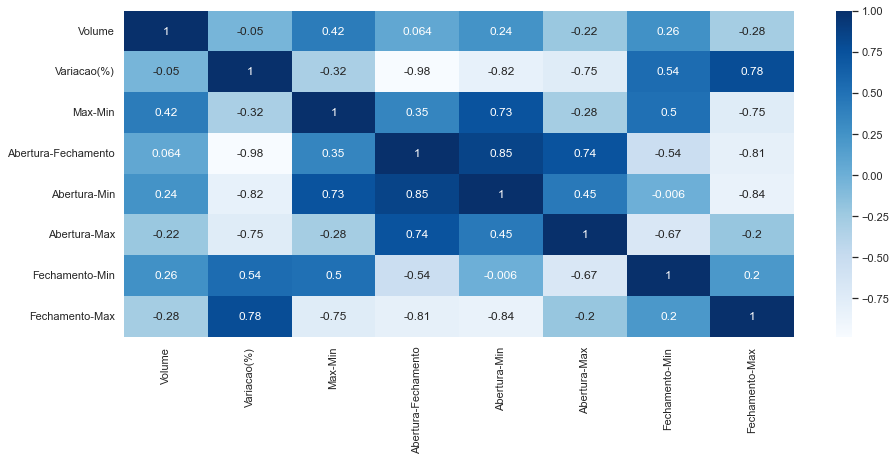

In [30]:
# retirando do dataframe as colunas altamente correlatas
df2 = df.drop(columns=["Abertura", "Ultimo", "Maxima", "Minima"])

# df2.describe()

# heatmap do "novo" df
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(), cmap="Blues", annot=True)

In [31]:
# formata os ticks do eixo y
def formata_eixo_y(valores, idx):
    if valores >= 1_000_000:
        formato = "{:1.1f}M".format(valores*0.000_001)
    else:
        formato = "{:1.0f}K".format(valores*0.001)
    return formato

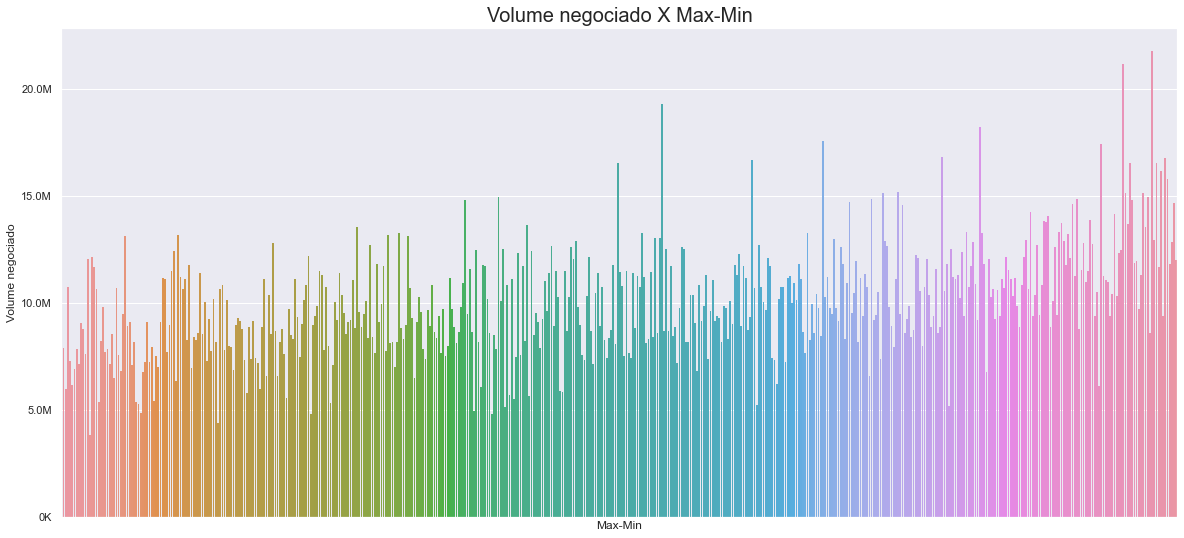

In [32]:
graph = sns.barplot(data=df2, x="Max-Min", y="Volume", lw=0, ci=None)
graph.yaxis.set_major_formatter(formata_eixo_y)
graph.set_title("Volume negociado X Max-Min")
graph.title.set_size(20)
graph.set_ylabel("Volume negociado")
graph.set(xlim=(df2["Max-Min"].min()) ,ylim=(0, None))

# TENTATIVA DE LIMPAR O LBL DO EIXO X
for ind, label in enumerate(graph.get_xticklabels()):
    label.set_visible(False)

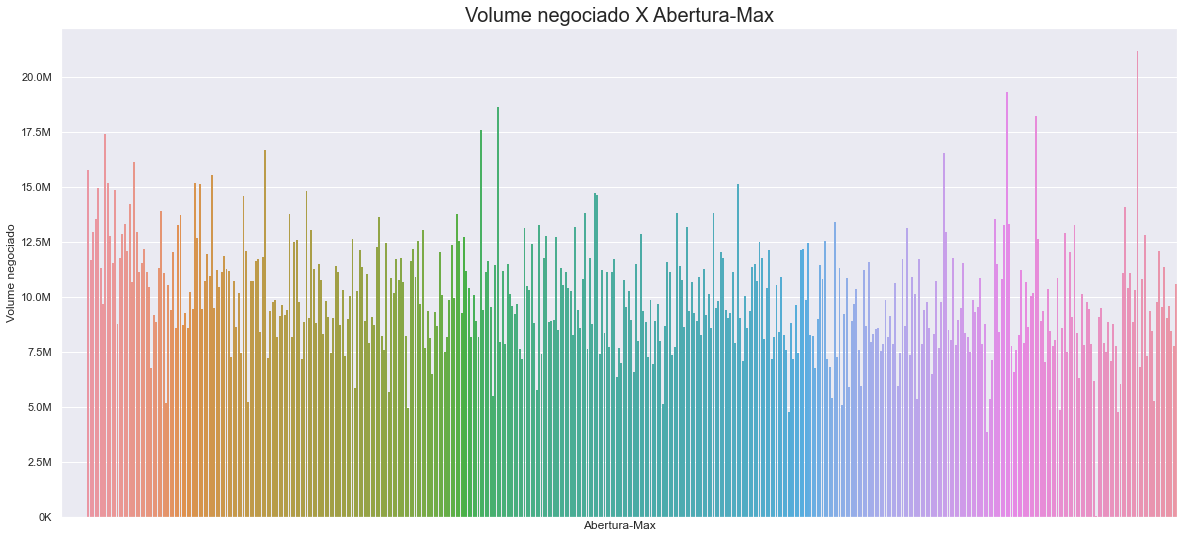

In [33]:
graph = sns.barplot(data=df2, x="Abertura-Max", y="Volume", lw=0, ci=None)

graph.yaxis.set_major_formatter(formata_eixo_y)
limits = graph.set(xlim=(df2["Abertura-Max"].min()) ,ylim=(0, None))
graph.set_title("Volume negociado X Abertura-Max")
graph.title.set_size(20)
graph.set_ylabel("Volume negociado")

# TENTATIVA DE LIMPAR O LBL DO EIXO X
for ind, label in enumerate(graph.get_xticklabels()):
    label.set_visible(False)


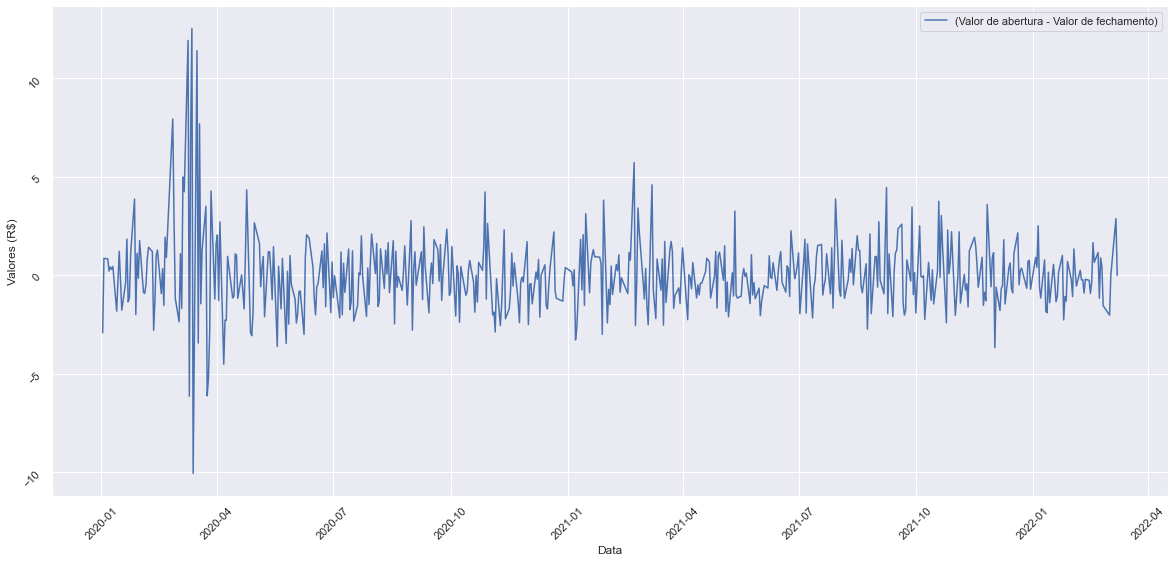

In [34]:
# df.info()

fig, axs = plt.subplots()
plt.tick_params(rotation=45)

axs.plot(df2.Data, df2["Abertura-Fechamento"])
axs.set_xlabel("Data")
axs.set_ylabel("Valores (R$)")
axs.legend(["(Valor de abertura - Valor de fechamento)", "Fechamento", "Ultimo", "Abertura"])


plt.grid(True)
plt.show()

In [35]:
# reorganiza colunas
df = df[["Data", "Abertura", "Minima", "Maxima", "Ultimo", "Volume", "Variacao(%)"]]
df_var = df.sort_values("Data")

display(df)

,Data,Abertura,Minima,Maxima,Ultimo,Volume,Variacao(%)
0,2022-03-08,111.594,111.590,111.703,111.610,32440,0.0001
1,2022-03-07,114.469,111.140,114.529,111.593,14060000,-0.0252
2,2022-03-04,115.166,113.389,115.166,114.474,10720000,-0.0060
3,2022-03-03,115.173,115.010,115.948,115.166,12120000,-0.0001
4,2022-03-02,113.143,113.143,115.429,115.174,10700000,0.0180
...,...,...,...,...,...,...,...
536,2020-01-08,116.667,115.693,117.335,116.247,5910000,-0.0036
537,2020-01-07,116.872,115.965,117.076,116.662,4850000,-0.0018
538,2020-01-06,117.707,116.269,117.707,116.878,6570000,-0.0070
539,2020-01-03,118.564,117.341,118.792,117.707,6830000,-0.0073


### Parte 2

In [36]:
# leitura dos arquivos
rb_resultado = pd.read_csv("desafio/Robos_resultado.csv", index_col=1, parse_dates=True)
rb_trade = pd.read_csv("desafio/Robos_trade.csv", index_col=1, parse_dates=True)

rb_trade.head()


,Unnamed: 0,2772803,2772804,2772805,2772806,2772807,2772808,2772809,2772810,2772811,...,2772928,2772929,2772930,2772931,2772932,2772933,2772934,2772980,2772981,2772982
date,,,,,,,,,,,,,,,,,,,,,
2020-05-05,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,2.0,0.0
2020-05-07,1,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,3,3,5.0,1.0
2020-05-08,2,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1.0,0.0
2020-05-11,3,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3.0,0.0
2020-05-12,4,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,4.0,0.0


In [37]:
# retorna o id (nome) das colunas duplicadas (ja existem outras identicas no df)
# complexidade de tempo O(n^2)
def get_id_coluna_duplicada(df):
    # cria conjunto que armazenara id das colunas duplicadas
    colunas_duplicadas = set()

    # varre todas as colunas do df  
    for i in range(df.shape[1]):
        # i-esima coluna
        col = df.iloc[:, i]

        # itera pelas colunas restantes do df (de i+1 ate a ultima)
        for j in range(i+1, df.shape[1]):
              
            # j-esima coluna
            col2 = df.iloc[:, j]

            # se as colunas i e j sao iguais, adiciona j ao conjunto
            if col.equals(col2):
                colunas_duplicadas.add(df.columns.values[j])
                  
    # retorna lista com id da coluna duplicada (nesse caso, o "nome" do robo)
    return list(colunas_duplicadas)

In [38]:
# renomea os robos (trunca os 4 primeiros chars)

rb_trade.rename(columns= lambda x : x[4:], inplace=True)
rb_resultado.rename(columns= lambda x : x[4:], inplace=True)

In [39]:
rb_trade.head()
# rb_trade.info()

,med: 0,803,804,805,806,807,808,809,810,811,...,928,929,930,931,932,933,934,980,981,982
date,,,,,,,,,,,,,,,,,,,,,
2020-05-05,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,2.0,0.0
2020-05-07,1,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,3,3,5.0,1.0
2020-05-08,2,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1.0,0.0
2020-05-11,3,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3.0,0.0
2020-05-12,4,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,4.0,0.0


In [40]:
rb_resultado.head()
# rb_resultado.info()

,med: 0,803,804,805,806,807,808,809,810,811,...,928,929,930,931,932,933,934,980,981,982
date,,,,,,,,,,,,,,,,,,,,,
2020-05-05,0,97.0,97.0,97.0,0.0,198.0,174.0,38.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,82.0,-76.666667,0.0
2020-05-07,1,79.0,79.0,79.0,-358.0,-119.0,-119.0,86.0,0.0,0.0,...,90.0,90.0,42.0,80.0,42.0,42.0,2.0,2.0,-57.857143,47.0
2020-05-08,2,57.0,57.0,57.0,-19.0,-138.0,-138.0,-60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,-44.000000,0.0
2020-05-11,3,73.0,73.0,73.0,-129.0,-195.0,-195.0,-195.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-72.0,-72.0,30.750000,0.0
2020-05-12,4,53.0,53.0,53.0,-264.0,-204.0,-204.0,-59.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,6.400000,0.0


In [41]:
# removendo "coluna extra" de indices
rb_trade.drop(rb_trade.columns[[0]], axis=1, inplace=True)
rb_resultado.drop(rb_resultado.columns[[0]], axis=1, inplace=True)

# converte os valores inteiros de rb_trade p/ float 
rb_trade = rb_trade.astype(float)

# adiciona novas colunas temporais
rb_trade["Ano"] = rb_trade.index.year
rb_trade["Mês"] = rb_trade.index.month_name()
rb_trade["Dia da semana"] = rb_trade.index.day_name()
rb_resultado["Ano"] = rb_resultado.index.year
rb_resultado["Mês"] = rb_resultado.index.month_name()
rb_resultado["Dia da semana"] = rb_resultado.index.day_name()

In [42]:
# ignora robos que nao realizaram nenhuma aperacao durante todo o periodo
robos_com_operacao = rb_trade.loc[:, (rb_trade != 0).any(axis=0)]

# ignora robos que nao nao realizaram nenhuma operacao em, no minimo, metade dos dias
num_maximo_zeros = np.ceil(rb_trade.shape[0] * .5)
robos_maior_operacao = rb_trade.loc[:, ((rb_trade == 0).sum(axis=0) <= num_maximo_zeros)]

In [43]:
# 2 robos nao realizaram nenhuma operacao durante o periodo observado
robos_sem_operacao = rb_trade.columns.difference(robos_com_operacao.columns)
# print(robos_sem_operacao)

# 15 dos 65 robos nao realizaram nenhuma operacao em, no minimo, metade do periodo observado
robos_menor_operacao = rb_trade.columns.difference(robos_maior_operacao.columns)
# print(robos_menor_operacao)

Text(0.5, 0, 'Data')

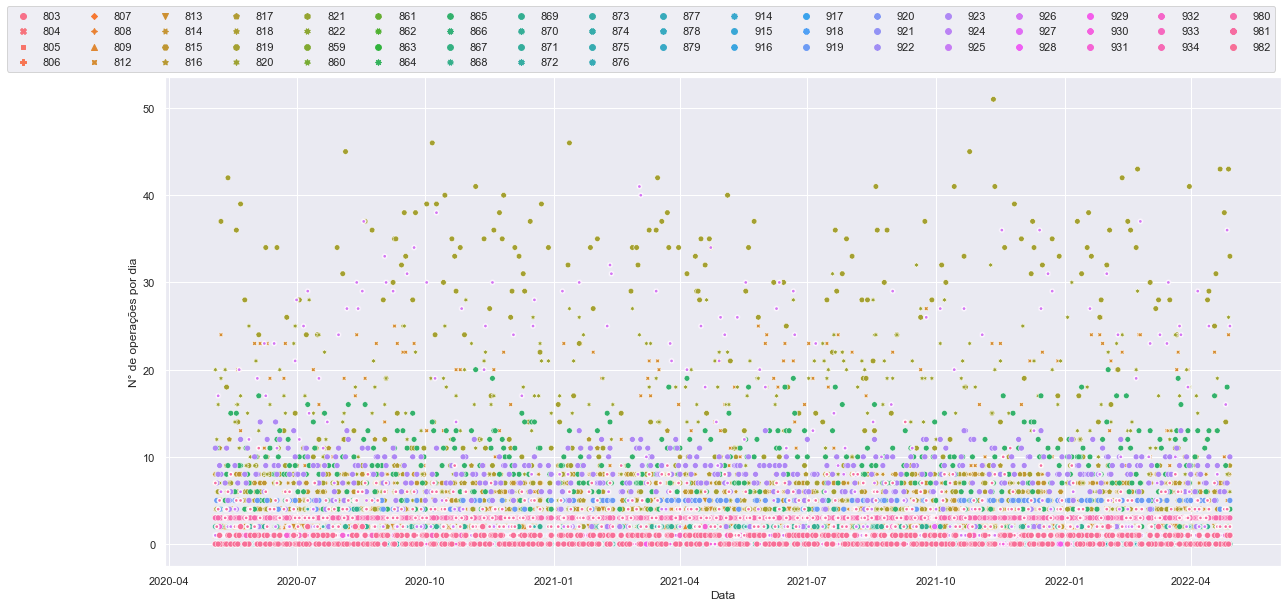

In [44]:
# TRADE - robos que operaram durante o periodo

sns.set(rc={'figure.figsize':(20, 9)})
axs3 = sns.scatterplot(data=robos_com_operacao.iloc[:,:-3]) # remove as ultimas tres colunas (ano, mes, dia da semana)
axs3.legend(bbox_to_anchor=(1, 1), loc="lower right", ncol=18)
axs3.set_ylabel("N° de operações por dia")
axs3.set_xlabel("Data")

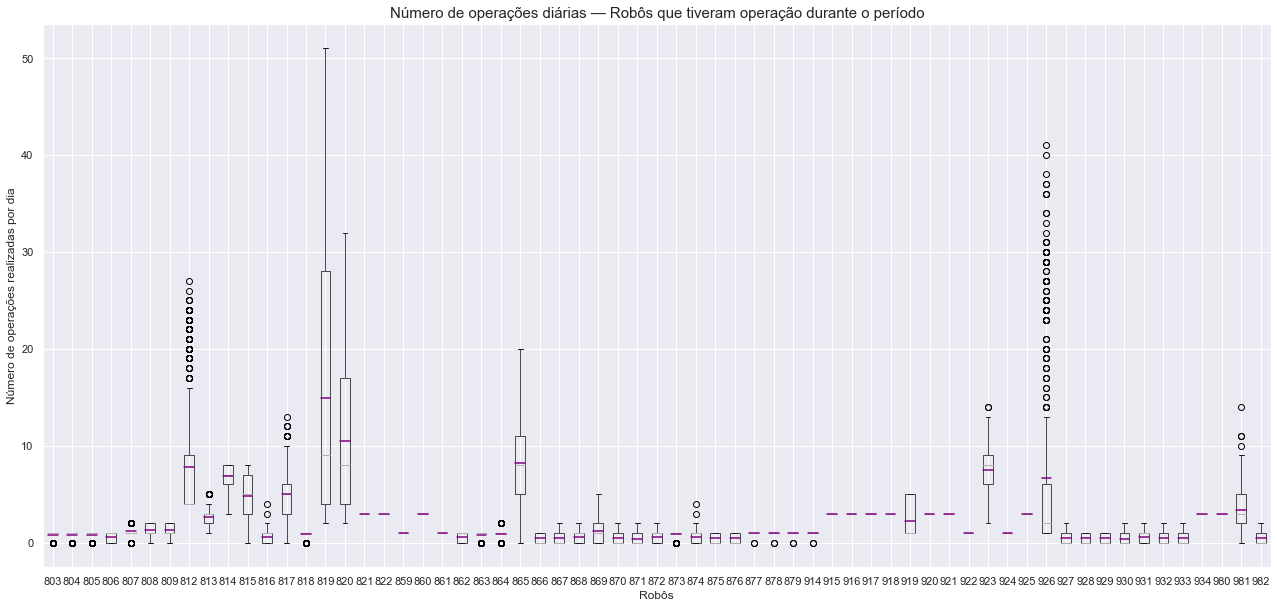

In [45]:
# TRADE - boxplot: num de operacoes de todos os robos que operaram
linha_media = dict(linestyle='-', linewidth=1.5, color='purple')
ax = rb_trade.iloc[:,:-3].drop(robos_sem_operacao, axis=1).boxplot(figsize=(22,10), meanprops=linha_media, meanline=True, showmeans=True)
ax.set_ylabel("Número de operações realizadas por dia")
ax.set_xlabel("Robôs")
ax.set_title("Número de operações diárias — Robôs que tiveram operação durante o período")
ax.title.set_size(15)

In [46]:
# deleta robos com resultados duplicados e os robos inoperantes em rb_resultado
rb_resultado.drop(robos_sem_operacao, axis=1, inplace=True)
cols_duplicadas = get_id_coluna_duplicada(rb_resultado)

for col in cols_duplicadas:
    if col in rb_resultado.columns:
        rb_resultado.drop(col, axis=1, inplace=True)

# printa "nome" dos robos cujo desempenho ja foi obtido por outros robos
print(cols_duplicadas)

['917', '982', '804', '929', '805', '934', '980', '933', '874']


Text(0, 0.5, 'Resultado financeiro por dia (R$)')

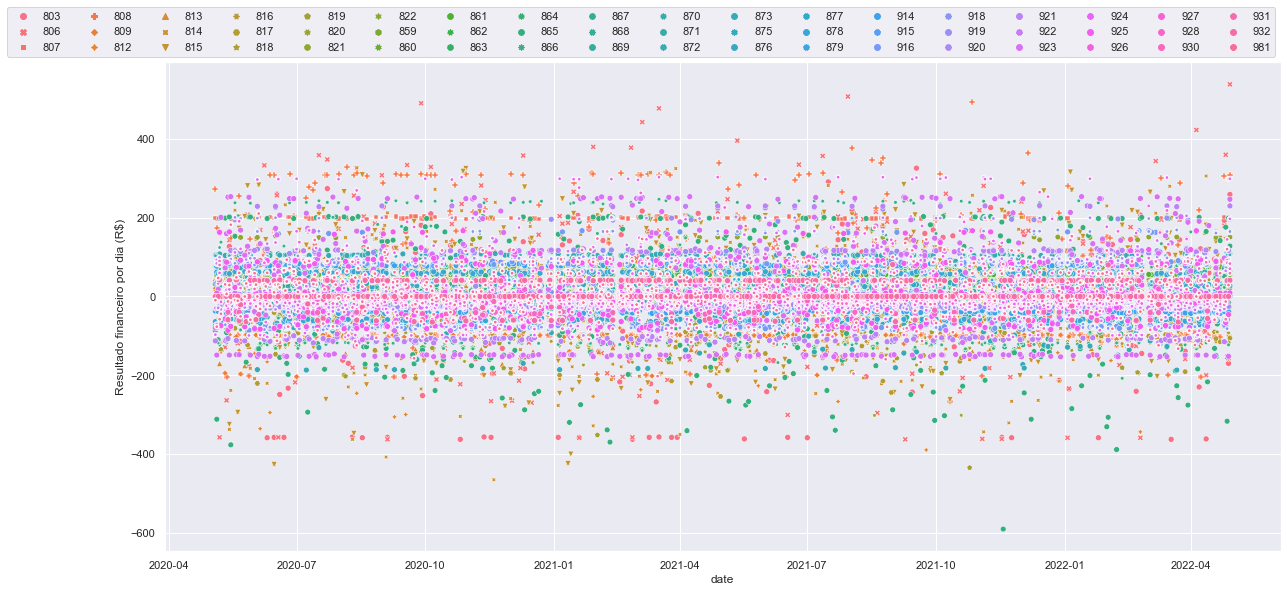

In [47]:
# RESULTADO - robos que operaram durante o periodo

sns.set(rc={'figure.figsize':(20, 9)})
axs5 = sns.scatterplot(data=rb_resultado.iloc[:,:-3]) # remove as ultimas tres colunas (ano, mes, dia da semana)
axs5.legend(bbox_to_anchor=(1, 1), loc="lower right", ncol=18)
axs5.set_ylabel("Resultado financeiro por dia (R$)")

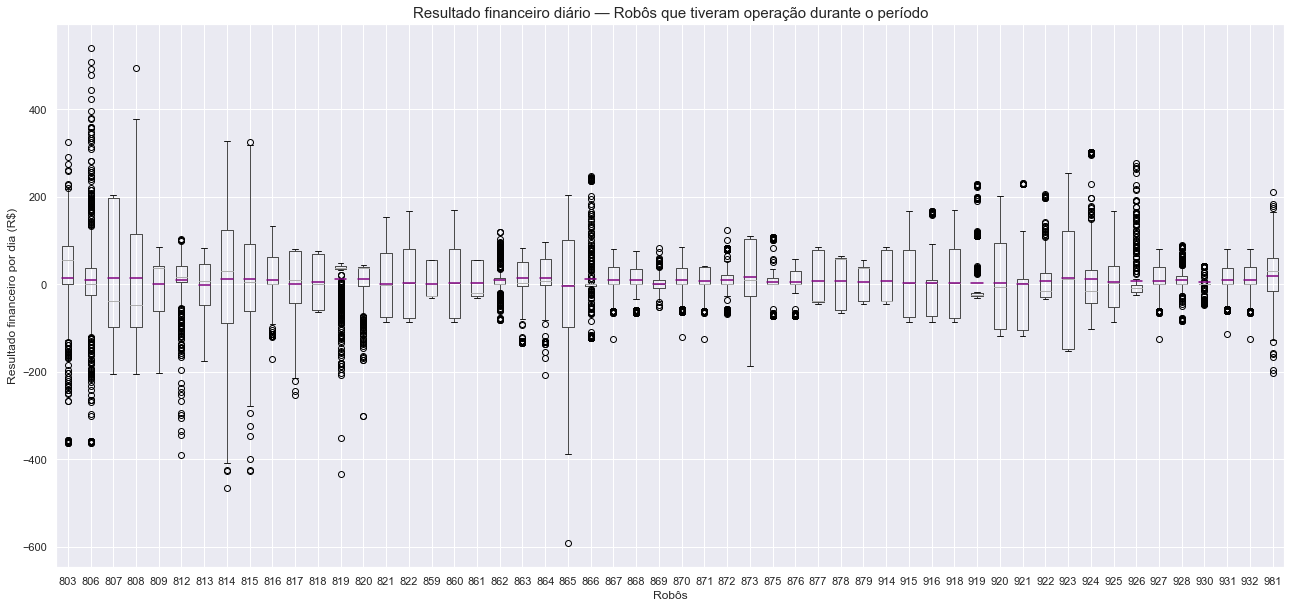

In [48]:
# RESULTADO - boxplot: resultado de todos os robos que operaram
ax = rb_resultado.iloc[:,:-3].boxplot(figsize=(22,10), meanprops=linha_media, meanline=True, showmeans=True)
# ax = rb_resultado.iloc[:,:-3].drop(robos_sem_operacao, axis=1).boxplot(figsize=(22,10), meanprops=linha_media, meanline=True, showmeans=True)
ax.set_ylabel("Resultado financeiro por dia (R$)")
ax.set_xlabel("Robôs")
ax.set_title("Resultado financeiro diário — Robôs que tiveram operação durante o período")
ax.title.set_size(15)
